# Определение перспективного тарифа для телеком компании

<p>Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
<p>Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

Для выполнения поставленной задачи выполним следующие шаги:
1. [Обзор данных](#step1)
2. [Подготовка данных](#step2)
    * [Изменение формата данных](#step2/1) 
    * [Базовая проверка даных](#step2/1) 
3. [Анализ поведения клиентов](#step3)
4. [Постановка и проверка гипотез](#step4)
    * [Гипотеза 1.  Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#step4/1)
    * [Гипотеза 2.  Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#step4/2)
5. [Общий вывод](#step5)

### Шаг 1. Обзор данных <a id='step1'></a>

Для начала работы с данными импортируем все необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем предоставленные данные с помощью read_csv и присвоим фреймам переменные.

In [2]:
calls = pd.read_csv('/datasets/calls.csv') #информация о звонках
internet = pd.read_csv('/datasets/internet.csv') #информация об интернет-сессиях
messages = pd.read_csv('/datasets/messages.csv') #информация о сообщениях
users = pd.read_csv('/datasets/users.csv') #информация о пользователях
tariffs = pd.read_csv('/datasets/tariffs.csv') #информация о тарифах

Рассмотрим детально каждую таблицу.
<p>Таблица users содержит иинформацию о пользователях:
    
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица calls(информация о звонках):
    
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица messages (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение 


In [5]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица internet (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [6]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица tariffs (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

In [7]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

Рассмотрели содержимое всех таблиц. В предствленных данных хранится информация об активности 500 пользователей.

### Шаг 2. Подготовка данных <a id='step1'></a>

#### Приведем столбцы  к нужному типу <a id='step2/1'></a>
<p> В каждой из табличек проверяем, что все столбцы имеют тот тип, который мы ожидаем, и в случае, если это не так, приводим к нужному типу.

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Для работы с датами переведем столбец reg_date и churn_date в формат datetime. Так как user_id концептуально не количесвенная переменная, то переведем ее в формат str. Также все стороги приведем к нижнему регистру, чтобы случайно не поймать артефакт.

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date']) #перевод в формат datetime
users['user_id'] = users['user_id'].astype('str') #преобразование в строку

for column in ['city', 'first_name', 'first_name', 'last_name', 'tariff']:
    users[column] = users[column].str.lower() #приведение к нижнему регистру

У нас есть пропуски в столбце churn_date. Так как на может быть интересн только факт отключения тарифа, то заполним пропуски 0. Даты же поменяем на 1. Перемеинуем столбец на is_churn.

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Когда ты вводишь новые категории, лучше это делать в новом столбце. Первоначальная информация может пригодиться.
</div>

In [10]:
users.loc[users['churn_date'].isna() == False, 'churn_date'] = 1 #замена заполненных столбцов на 1
users['churn_date'] = users['churn_date'].fillna(0) #заполнение пропусков 0
users.rename(columns={'churn_date': 'is_churn'}, inplace = True) #перемеиванование столбца

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
age           500 non-null int64
is_churn      500 non-null int64
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Формат данных поменяли. Перейдем к таблице *calls*.

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Периведем user_id к строковому типу и call_date к datetime.

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date']) #преобразование в datetime
calls['user_id'] = calls['user_id'].astype('str')

Мы занем, что компания всегда округляет минуты в большую сторону. Применим округление к большему целому и изменим тип данных на int.

In [14]:
calls['duration'] = np.ceil(calls['duration']) #округление до большего целого
calls['duration'] = calls['duration'].astype('int') #преобразование в int

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ MB


Рассмотрим таблицу *internet*.

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Преведем session_date к формату datetime. Usere_id переведем в формат str. 
<br> Также нам известно, что компания округляет трафик в большую сторону. Округлим значения в столбце mb_used и переведем в формат int.

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date']) #перевод в datetime
internet['user_id'] = internet['user_id'].astype('str') #замена на str

internet['mb_used'] = np.ceil(internet['mb_used']) #округление до большего
internet['mb_used'] = internet['mb_used'].astype('int') #формат в int

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.7+ MB


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Молодец,что не забыл про необходимое условие округления минут и Мб.

</div>

Рассмотрим таблицу *messages*.

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


По аналоги с другими таблицами, провелем манипуляции  над датами (message_date) и user_id. 

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['user_id'] = messages['user_id'].astype('str')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


Перейдем к каталогу *tariffs*.

In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные имеют ожидаемый формат.
<p> После перевода всех типов к ожидаемым, можем перейти к базовой проверки даных.

#### Базовая проверка данных <a id='step2/2'></a>

Проверим данные в основной таблице users_id.

In [20]:
users.describe()

,age,is_churn
count,500.00000,500.000000
mean,46.58800,0.076000
std,16.66763,0.265264
min,18.00000,0.000000
25%,32.00000,0.000000
50%,46.00000,0.000000
75%,62.00000,0.000000
max,75.00000,1.000000


In [21]:
users.select_dtypes(include=['object', 'datetime']).describe()

,user_id,city,first_name,last_name,reg_date,tariff
count,500,500,500,500,500,500
unique,500,76,246,419,270,2
top,1020,москва,радим,андреенко,2018-05-28 00:00:00,smart
freq,1,99,6,5,8,351
first,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,NaN


Возраст клиентов от 18 до 75 лет. Большинство пользователь в выборке из Москвы. Каких либо ошибок в данных не наблюдается. 
<br> Для удобства анализа создадим в сете дополнительный столбец с идентификатором месяца.

In [22]:
users['month'] = users['reg_date'].dt.month #столбец с номером месяца
users.head()

,user_id,age,is_churn,city,first_name,last_name,reg_date,tariff,month
0,1000,52,0,краснодар,рафаил,верещагин,2018-05-25,ultra,5
1,1001,41,0,москва,иван,ежов,2018-11-01,smart,11
2,1002,59,0,стерлитамак,евгений,абрамович,2018-06-17,smart,6
3,1003,23,0,москва,белла,белякова,2018-08-17,ultra,8
4,1004,68,0,новокузнецк,татьяна,авдеенко,2018-05-14,ultra,5


Посмотрим на данные из таблицы calls.

In [23]:
calls.describe()

,duration
count,202607.000000
mean,7.158198
std,5.959173
min,0.000000
25%,2.000000
50%,6.000000
75%,11.000000
max,38.000000


Минимальное время звонка равно 0. Посмотрим распределение времени на гистограмме.

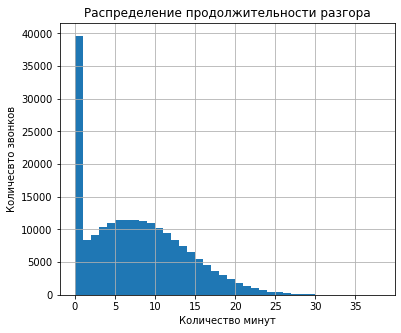

In [24]:
plt.figure(figsize=(6,5))
plt.hist(calls['duration'], bins = 38)
plt.gca().set(title='Распределение продолжительности разгора', ylabel='Количесвто звонков', xlabel='Количество минут')
plt.grid();

In [25]:
len(calls.query('duration == 0'))

39613

У нас в данных имеется 39613 нулевых значений. Возможно это пропушенные звонки. Они не влияют на количесво потраченных пользователем минут, но влияют на общее количесво операций и сдвигают среднее. Удалим все нулевые значений.

In [26]:
calls = calls.loc[calls['duration'] != 0] #убираем нулевые значения
calls.shape

(162994, 4)

In [27]:
calls.select_dtypes(include=['object', 'datetime']).describe()

,id,call_date,user_id
count,162994,162994,162994
unique,162994,365,492
top,1135_171,2018-12-31 00:00:00,1377
freq,1,1173,1424
first,NaN,2018-01-01 00:00:00,NaN
last,NaN,2018-12-31 00:00:00,NaN


Артефактов и необычных значений нет. Добавим столбец с месяцем и перейдем к следующей таблице.

In [28]:
calls['month'] = calls['call_date'].dt.month 
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9


Посчитаем количество минут израсходованное клиетном в каждом месяце. Для этого сгруппируем данные по uder_id и month.

In [29]:
calls_grp = calls.groupby(['user_id', 'month']).agg({'duration': ('count','sum')})
calls_grp.columns = ['number_of_calls','sum_duration']
calls_grp = calls_grp.reset_index()
calls_grp.head()

,user_id,month,number_of_calls,sum_duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


Исследуем таблицу messages.

In [30]:
messages.select_dtypes(include=['object', 'datetime']).describe()

,id,message_date,user_id
count,123036,123036,123036
unique,123036,364,426
top,1135_171,2018-12-31 00:00:00,1277
freq,1,859,1463
first,NaN,2018-01-02 00:00:00,NaN
last,NaN,2018-12-31 00:00:00,NaN


Есть пользователи, котрые ниразу не отправляли сообщения. Добавим колонку с месяцем отправки СМС. И посчитаем количесво отправленных сообщений для каждого клиента по месяцам.

In [31]:
messages['month'] = messages['message_date'].dt.month #добавляем столбец с месяцем

messages_grp = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'})
messages_grp.columns = ['count_messages']
messages_grp = messages_grp.reset_index()
messages_grp.head()

,user_id,month,count_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Исследуем данные из таблицы internet.

In [32]:
internet.describe()

,Unnamed: 0,mb_used
count,149396.000000,149396.000000
mean,74697.500000,370.622098
std,43127.054745,278.387019
min,0.000000,0.000000
25%,37348.750000,139.000000
50%,74697.500000,349.000000
75%,112046.250000,560.000000
max,149395.000000,1725.000000


У нас есть нулевой трафик. Оценим его влияние по гистограмме распределения.

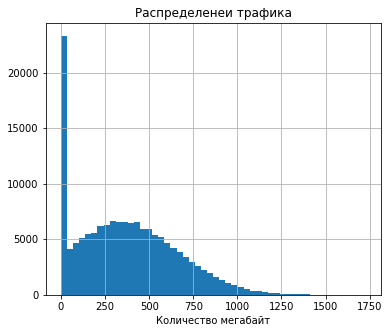

In [33]:
plt.figure(figsize=(6,5))
plt.hist(internet['mb_used'], bins = 50)
plt.gca().set(title='Распределенеи трафика', xlabel = 'Количество мегабайт')
plt.grid();

У нас есть большое количесво нулевого трафика. Посмторим есть ли какая нибудь зависимоть во времени.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


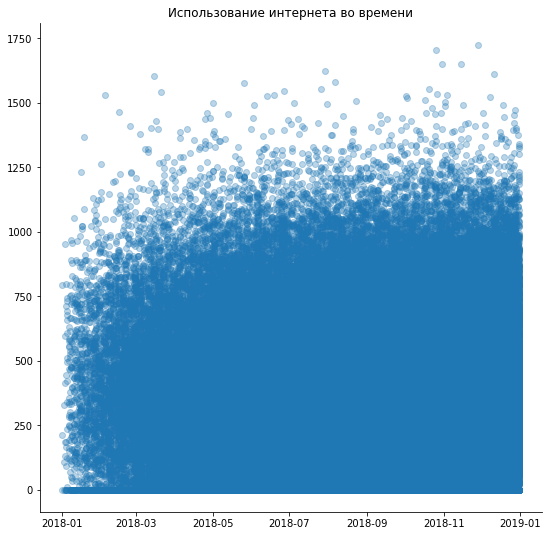

In [34]:
df = internet.set_index('session_date')
plt.figure(figsize = (9,9))
plt.plot(df['mb_used'], 'o', alpha = 0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Использование интернета во времени');

Каждый день есть нулевой трафик. Возможно это неудачные попытки соединения с интернетом. Напрмиер на трассе или метро. 
<br> Так как эти выбросы влияют на среднее значение, то просто удалим их. После посмтрим что в остальных столбцах.

In [35]:
internet = internet.loc[internet['mb_used'] != 0] #убираем нулевой трафик
internet.select_dtypes(include = ['object', 'datetime']).describe()

,id,session_date,user_id
count,129798,129798,129798
unique,129798,365,497
top,1135_171,2018-12-31 00:00:00,1240
freq,1,916,731
first,NaN,2018-01-01 00:00:00,NaN
last,NaN,2018-12-31 00:00:00,NaN


Артефактов нет. Можно заменить, что есть пользователи, которые не пользуются интернетом.
<br> Выделим месяц в отдельный столбец и посчитаем используем трафик. Для этого сгреппируем данные.

In [36]:
internet['month'] = internet['session_date'].dt.month #добавляем столбец с месяцем

internet_grp = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
internet_grp = internet_grp.reset_index()
internet_grp.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


Мы подготовили таблицы, теперь их можно объединить в одну таблицу data. Перед этим посомтрим размеры объединяемых таблиц, что знать конечный размер таблицы.

In [37]:
#посмотрим размеры таблиц
print('calls_grp', calls_grp.shape)
print('messages_grp', messages_grp.shape)
print('internet_grp', internet_grp.shape)

calls_grp (3168, 4)
messages_grp (2717, 3)
internet_grp (3201, 3)


In [38]:
data = internet_grp.copy()
data = data.merge(calls_grp, on = ['user_id', 'month'], how='outer')
data = data.merge(messages_grp, on = ['user_id', 'month'], how = 'outer')
data = data.merge(users[['user_id','city', 'tariff']], on ='user_id', how = 'left')
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True) #перемеиноем столбец для объединения
data = data.merge(tariffs, on='tariff', how='left')
data

,user_id,month,mb_used,number_of_calls,sum_duration,count_messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2256.0,17.0,159.0,22.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,23257.0,28.0,172.0,60.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,14016.0,41.0,340.0,75.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,14070.0,42.0,408.0,81.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,14581.0,46.0,466.0,57.0,краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,12,NaN,38.0,260.0,39.0,курган,ultra,1000,30720,3000,1950,150,1,1
3210,1365,10,NaN,5.0,43.0,1.0,ростов-на-дону,smart,50,15360,500,550,200,3,3
3211,1377,2,NaN,20.0,179.0,2.0,брянск,ultra,1000,30720,3000,1950,150,1,1
3212,1392,2,NaN,2.0,13.0,3.0,челябинск,ultra,1000,30720,3000,1950,150,1,1


В некоторых столбцах появились пропуски (NaN). Это поммешает дальнешим арифметическим операциям. Заменим их нулями.

In [39]:
for columns in ['mb_used', 'count_messages', 'sum_duration']:
    print('Пропусков до заполнения', columns, data[columns].isna().sum())
    data[columns] = data[columns].fillna(0)
    print('Пропусков после заполнения', columns, data[columns].isna().sum())

Пропусков до заполнения mb_used 13
Пропусков после заполнения mb_used 0
Пропусков до заполнения count_messages 497
Пропусков после заполнения count_messages 0
Пропусков до заполнения sum_duration 46
Пропусков после заполнения sum_duration 0


<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

<s>Как ты думаешь, из-за чего могли появиться пропуски?</s>

</div>

<div class="alert alert-info">

Я делал внешнее соединение, чтобы не потерять данные. Поэтому если пользователь не пользовался какой-либо услугой (например сообщениями) в определенный месяц, то на месте числа сообщений получался пропуск.

</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Да, абсолютно с тобой согласна.

</div>

Посчитам перерасход каждого клиента по минутам, интернет трафику и сообщениям. Для этого вычтим тарифные опции из фактических данных и умножим на тариф перерасхода. Если появятся отрицательные значения, то обнулим их.

In [40]:
data['overrun_minutes'] = (data['sum_duration'] - data['minutes_included']) * data['rub_per_minute']
data['overrun_messages'] = (data['count_messages'] - data['messages_included']) * data['rub_per_message']
data['overrun_gb'] = np.ceil((data['mb_used'] - data['mb_per_month_included']) / 1024) * data['rub_per_gb']

In [41]:
#обнулим отрицательные значнеия
for columns in ['overrun_minutes', 'overrun_messages', 'overrun_gb']:
    data.loc[data[columns] < 0, columns] = 0

In [42]:
#помесячная выручка
data['total_fee'] = data['rub_monthly_fee'] + data['overrun_minutes'] + data['overrun_messages'] + data['overrun_gb'] 

In [43]:
data.head()

,user_id,month,mb_used,number_of_calls,sum_duration,count_messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,overrun_minutes,overrun_messages,overrun_gb,total_fee
0,1000,5,2256.0,17.0,159.0,22.0,краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,23257.0,28.0,172.0,60.0,краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,14016.0,41.0,340.0,75.0,краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,14070.0,42.0,408.0,81.0,краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,14581.0,46.0,466.0,57.0,краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


In [44]:
data = data.drop(data.loc[:,'messages_included' : 'overrun_gb'], axis='columns') #удалим лишние столбцы

In [45]:
data

,user_id,month,mb_used,number_of_calls,sum_duration,count_messages,city,tariff,total_fee
0,1000,5,2256.0,17.0,159.0,22.0,краснодар,ultra,1950.0
1,1000,6,23257.0,28.0,172.0,60.0,краснодар,ultra,1950.0
2,1000,7,14016.0,41.0,340.0,75.0,краснодар,ultra,1950.0
3,1000,8,14070.0,42.0,408.0,81.0,краснодар,ultra,1950.0
4,1000,9,14581.0,46.0,466.0,57.0,краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1273,12,0.0,38.0,260.0,39.0,курган,ultra,1950.0
3210,1365,10,0.0,5.0,43.0,1.0,ростов-на-дону,smart,550.0
3211,1377,2,0.0,20.0,179.0,2.0,брянск,ultra,1950.0
3212,1392,2,0.0,2.0,13.0,3.0,челябинск,ultra,1950.0


Теперь данные готовы к дальнейшему анализу.

### Вывод

В этом шаге провели подготовку данных к анализу. Все неожилаемые типы данных были приведены к соответсвующим типам. Фоматы даты в datetime, user_id в str. Также преревели минуты и трафик в целые числа с округленеим в большую сторону. При проведении предварительного анализа были удалены нули звонков и трафика и после объединения таблиц пропуски в данных заменены нулями. Последним шагом была расчитана помесячная выручка с каждого пользователя. Теперь данные готовы к анализу.

### Шаг 3. Анализ поведения клиентов <a id='step3'></a>

Посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. 
Начнем с минут разгора, для этого построим гистограммы распределения для каждого тарифа и наложим на него кривую.

In [46]:
#функция для посторояния графиков распрделение
def distribution(data, service, bins_count, xmax, title='Title', xlabel='xlabel'):
    plt.figure(figsize=(9, 7))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    sns.distplot(data.loc[data['tariff'] == 'smart', service], 
                 color="m", kde=True, bins=bins_count, label = 'smart')
    sns.distplot(data.loc[data['tariff'] == 'ultra', service],
                 color="b", kde=True, bins=bins_count, label = 'ultra')
    plt.title(title, size=14)
    plt.legend(fontsize=12)
    plt.xlim(0, xmax)
    plt.xlabel(xlabel)
    plt.show()

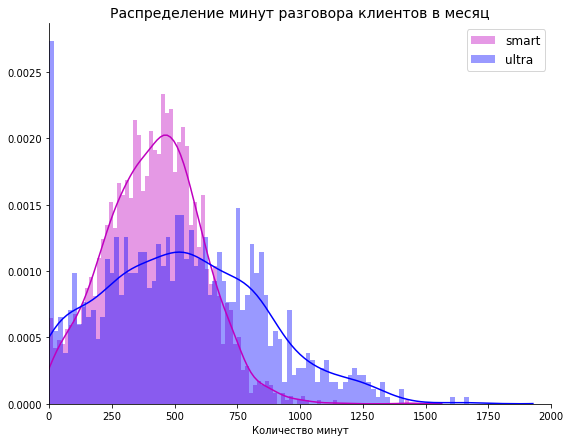

In [47]:
#дианамма распределнеия для времени разговров
distribution(data, 'sum_duration', 90, 2000,
             title='Распределение минут разговора клиентов в месяц', xlabel='Количество минут')

По распределнию видно, что пользователи видут себя поразному.
Среднее время разговоров у пользователей с тарифом ultra немного больше. При этом видно, что данные для этого тарифа имеют ботльшой разброс значений, средовательно больше дисперсию и стандартное отклонение. Несомтря на то, что при обработки данных мы удалили 0, при объединении данных снова появились нулевые звонки. Возможно, это симкарты, которые люди используют для Usb модемов, по котрым не осуществляются звонки.
<br> Для тарифа smart разброс во времени меньше и звонки стремяться к среднему.
<p> Посчитаем среднее время, дисперсию и стандартное отклонение для каждого тарифа.

In [48]:
#вывод статистик
def statistics(data, column):
    d = []
    for row in ['smart', 'ultra']:
        d.append({'tariff': row,'mean': np.mean(data.loc[data['tariff'] == row, column]).round(2),
                  'variance': np.var(data.loc[data['tariff'] == row, column]).round(2),
                  'std': np.std(data.loc[data['tariff'] == row, column]).round(2)})
    return pd.DataFrame(d).set_index('tariff')     

In [49]:
statistics(data, 'sum_duration')

,mean,variance,std
tariff,,,
smart,417.93,36203.07,190.27
ultra,526.62,100771.22,317.44


Числовые данные подтверждают графики. 

<p> Теперь посомтрим распределение для обоих тарифов по использованию сообщений.

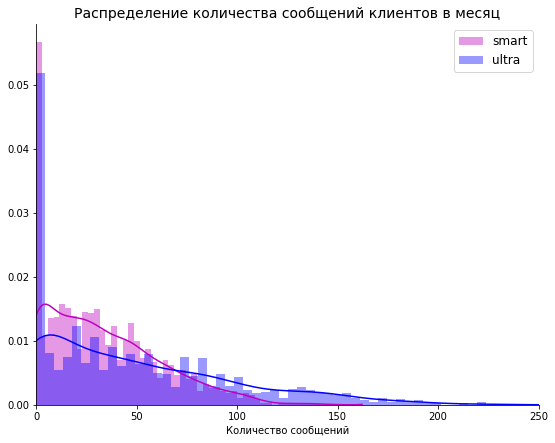

In [50]:
#распределнеия для количесвта сообщений
distribution(data, 'count_messages', 50, 250,
             title='Распределение количества сообщений клиентов в месяц', xlabel='Количество сообщений')

In [51]:
statistics(data, 'count_messages')

,mean,variance,std
tariff,,,
smart,33.38,796.46,28.22
ultra,49.36,2282.95,47.78


По графику видно, что мы имеем большое число нулевых значений. Это значит, что многие пользователи месяцами не используют сообщения по несколько месяцев. Среднее количество сообщений и людей с тарифом ультра больше. Также эти данные более разнообразные, так как имеют большую дисперсию. Это видно и по размаху графика.
<p> Посмотрим на использования клиентами интернета. Постоим диаграмму распределения и выведем численные статистики выборки.

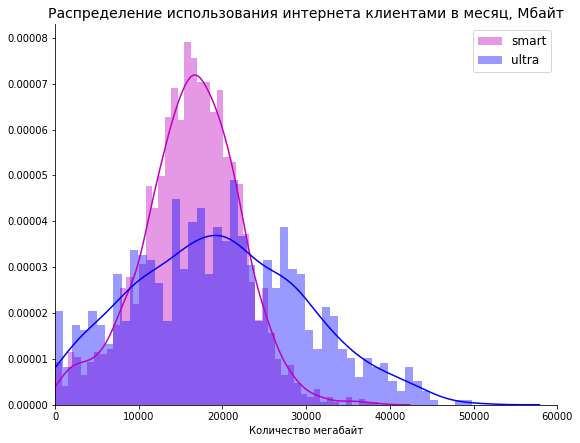

In [52]:
#распределнеия для количесвта сообщений
distribution(data, 'mb_used', 50, 60000,
             title='Распределение использования интернета клиентами в месяц, Мбайт', xlabel='Количество мегабайт')

In [53]:
statistics(data, 'mb_used')

,mean,variance,std
tariff,,,
smart,16229.19,3.453041e+07,5876.26
ultra,19486.90,1.018321e+08,10091.19


Аналогично предыдущим услугам, распределение пользователь с тарифом ultra имеет больший размах и дисперсию. Среднее количество мегабайт у пользователей тарифа также больше.

Посмотрим, как распределена выручка по месяцам для каждого тарифа. Также для подсчета суммарной выручки найдем количество уникальных пользователей по месяцам. Создадим сет со всей интересующей нас информацией.

In [54]:
month_grp = data.groupby(by = ['month', 'tariff']).agg({'total_fee': 'mean'}) #сгруппируем данные и найдем среднюю выручку gj 
month_grp.columns = ['fee_per_client']

clients = data[['user_id', 'month', 'tariff']].drop_duplicates(keep = 'first') #сет с уникальными пользователями
clients_grp = clients.groupby(by = ['month', 'tariff']).agg({'user_id': 'count'}) #количество уникальных пользователей
clients_grp.columns = ['users_count']

month_full = month_grp.join(clients_grp) #соедлиним талицу
month_full['total_fee'] = month_full['fee_per_client'] * month_full['users_count'] #суммараня средняя выручка по тарифам
month_full.reset_index(level='tariff', inplace = True)

Построим графики для средней выручки с каждого клиента и суммарной выручкой по месяцам. 

In [55]:
def plots(data, column, title = 'Измененение', ylabel = 'Что по оси'):
    plt.figure(figsize = (9, 7))
    colors = {'smart': 'm', 'ultra': 'b'} #словарь для цветов
    for tariff, color in colors.items():
        plt.plot(data.loc[data['tariff'] == tariff, column], color = color)
    plt.title(title)
    plt.grid()
    plt.legend(['smart', 'ultra'])
    plt.xticks(data.index)
    plt.xlabel('Месяц')
    plt.ylabel(ylabel)
    plt.show()

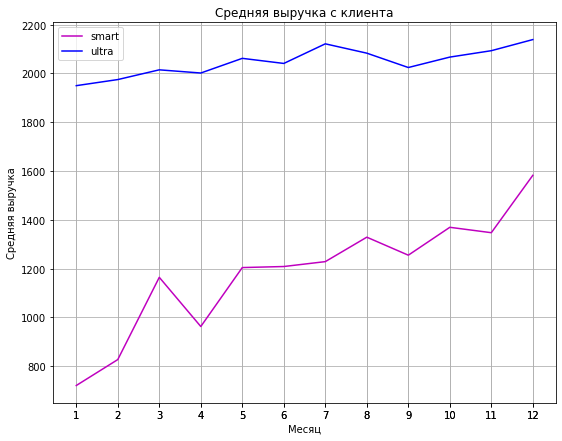

In [56]:
plots(month_full, 'fee_per_client', title = 'Средняя выручка с клиента', ylabel = 'Средняя выручка')

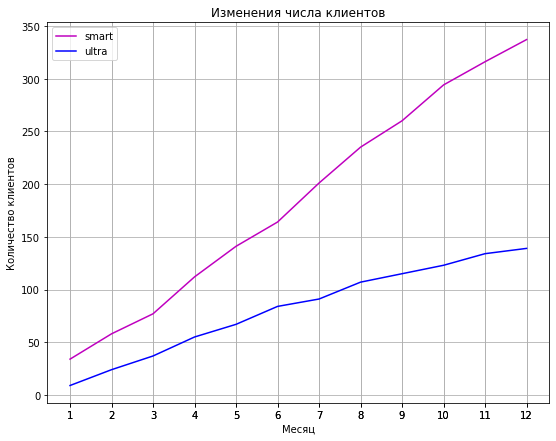

In [57]:
plots(month_full, 'users_count', title = 'Изменения числа клиентов', ylabel = 'Количество клиентов')

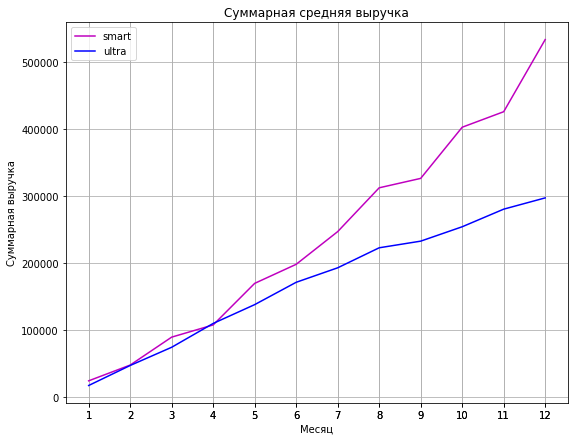

In [58]:
plots(month_full, 'total_fee', title = 'Суммарная средняя выручка', ylabel = 'Суммарная выручка')

На графике видно, что средняя выручка с одного клиента для тарифа ultra не меняется, при этом пользователи тарифом smart с каждым месяцем тратят все больше. При этом, езко растет число пользователей тарифом smart. Этот прирост пользователей и в целом увеличение выручки с однго пользователя, привели к резкому увеличению суммарной выручки с пользователей с тарифом smart. По графику видно, что тариф smart более динамично развивается, привлекает большее количество клиентов и больше увеличивает прибыль. В данной выборке тариф смарт приносит больше денег.

### Вывод

В этом шаге рассмотрели  распределение минут разговора, количества сообщений и объём интернет-трафика пользователей каждого тарифа в месяц. Все средние показатели у пользователей тарифа ultra выше, чем у пользователей тарифа смарт. Так же стоит отметить, что у пользователей тарифом ultra большой разброс в данных и высокая дисперсия. Значит все пользователи пользуются тарифом по-разному. У пользователей тарифом smart больше значений лежат ближе к среднему значению, поэтому ниже дисперсия.
<br> Несмотря на то, что в данной выборке, средняя выручка с одного клиента у тарифа ultra больше, но она равномерна, а у  тарифа smart наблюдается уверенный рост в течениии когда. Люди в  выборке присоединялись к оператору не равномерно, и большая динамика у тарифа смарт. Этот рост всех параметров повлиял на суммарную среднюю выручку. Со второго полугодия наблюдается резкий рост выручки с тарифа смарт,и эта тенденция сохраняется до конца года. Таким образом, по выборке тариф smart быгоднее для компании.

### Шаг 4. Постановка и проверка гипотез <a id='step4'></a>

#### Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается <a id='step4/1'></a>

Проверим гипотезу о том, что средняя выручка у пользователей разными тарифами отличается.
<br> Нулевая гипотеза(H0): Средняя выручка у тарифом не отличается;
<br> Альтернативная гипотеза(Н1): выручка отличается
<br> Для проверки данной гипотезы будем использовать t-критерий для независимых выборок. Так как дисперсия может влиять на результат теста, то сначала проверим равенство дисперсий. Для этого воспользуемся тестом Левене. Нулевая гипотеза теста: дисперсии равны.
<br> Для обоих тестов уровень значимости возьмем 0,05                                                

In [59]:
#создание выборок
smart = data.loc[data['tariff'] == 'smart', 'total_fee']
ultra = data.loc[data['tariff'] == 'ultra', 'total_fee']

alpha = .05

results = st.levene(smart, ultra)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6855369377883898e-124
Отвергаем нулевую гипотезу


P-уровень значимости меньше 0.05, следовательно у нас достаточно оснований отклонить нулевую гипотезу. Предполагаем, что дисперсии выборок не равны.
Проведем t-тест для выборок с равными дисперсиями.

In [60]:
results = st.ttest_ind(smart, ultra, equal_var = False)
print('p-значение:', results.pvalue)
print('t-критерий:', results.statistic)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530856e-246
t-критерий: -36.68175826499966
Отвергаем нулевую гипотезу


Можем отвергнуть нулевую гипотезу. Это исследование доказало,что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Гипитеза 1 подтвердилась. При этом t-критерий отрицательный. Это значит что выручка пользователей тарифом smart меньше.                                                       

<a id='step4/2'></a>
#### Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

Проверим гипотезу о том, что есть зависимость между регионом и средней выручкой пользователей. 
<br>Нулевая гипотеза(Н0): средняя выручка не отличается;
<br>Альтернативная гипотеза(Н1): средняя выручка значимо отличается в Москве и регионах.
<br> Для проверки гипотез воспользуемся t-критерием для независимых выборок. Сначала также проверим гипотезу о равенстве дисперсий с помощью теста Левене. Нулевая гипотеза: дисперсии обоих выборок равны. 
<br> Уровень значимости для всех тестов - 0.05

In [61]:
#массивы для провеки гипотез
moscow = data.loc[data['city'] == 'москва', 'total_fee']
regions = data.loc[data['city'] != 'москва', 'total_fee']

#тест Левене
#Н0 Дисперсии двух выборок равны
results = st.levene(moscow, regions)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.009373921759468934
Отвергаем нулевую гипотезу


In [62]:
#t-тест для независимых выборок с неравными дисперсиями
region_test = st.ttest_ind(moscow, regions, equal_var = False)
print('p-значение:', region_test.pvalue)
print('t-критерий:', region_test.statistic)
if (region_test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
t-критерий: 0.6549479358773751
Не получилось отвергнуть нулевую гипотезу


Тест не показал статически значимые различия в средней выручки пользователей из Москвы и других регионов. Гипотеза 2  не подтвердилась.

### Вывод

Проверили две гипотезы о разнице средней выручки от пользователей с разными тарифными планами и зависимости выручики от региона. Первая гипотеза подтвердилась, вторая нет. В результате анализа были выявлены статически значимые различия между средней выручкой пользователей с тарифами Smart и Ultra. У пользователей из разных регионов средняя выручка не отличается. Средняя выручка пользователей с тарифом ultra выше в гениральной совокупности.

### Общий вывод <a id='step5'></a>

В работе проводился предварительный анализ тарифом мобильного оператора на выборке из 500 человек. Первым делом была проведена предобработка данных: изменение типов данных на ожидаемый и базовая проверка данных на выбросы. Были обнаружены нулевые значения в минутах разговора и пользованиии интернетом. Данные были удалены. 
<br> Следующим шагом был анализ поведения пользователей с разными тарифами. Данные пользователей с тарифом ultra менее однародны, наблюдается большая дисперсия и длинные хвосты распределений. Пользователи с тарифом Smart пользуются тарифом более ожидаемо. 
<br> В ходе анализа были выдвинуты две гипотезы о различии выручки от пользователей с разными тарифами и различии выруски от региона. Первая гипотеза подтвердилпсь. Есть основания полагать что средняя выручка от пользователей с тарифом ultra выше, чем от тарифа smart. Вторая гипотеза не подтвердилась. Средняя выручка пользователей из Москвы статистически не отличается от выручки пользователей из других регионов.
<br> Несмотря на то, что средняя выручка у тарифа ultra выше в течении года, наблюдается резкий подъем выручки у пользователей smart. При этом их число растет более стремительно и выборке суммарная выручка выше. Из этого можно сделать вывод, что тариф smart более выгодный для компании.